<a href="https://colab.research.google.com/github/ibrta/examen_resolution/blob/EXAMENS-PRATIQUES-EN-CLASSES/Projet_extra1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Prétraiter les données
X_train = X_train.reshape(-1, 28, 28, 1) / 255  # Normaliser et ajouter la dimension des canaux
X_test = X_test.reshape(-1, 28, 28, 1) / 255

# Encoder les étiquettes en format one-hot
num_classes = 10
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Diviser les données d'entraînement en ensembles d'entraînement et de validation
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.1, random_state=42)

# Définir le générateur de données augmentées (optionnel)
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Définir l'architecture du modèle
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compiler le modèle
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
batch_size = 32  # Taille de lot recommandée
epochs = 10
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    data_generator.flow(X_train, y_train_encoded, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=data_generator.flow(X_val, y_val_encoded, batch_size=batch_size),
    validation_steps=len(X_val) // batch_size, # Ajout de validation_steps (#)
    callbacks=[early_stop]
)
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


WARNING:absl:`lr` is deprecated in Keras optimizer, please use `learning_rate` or use the legacy optimizer, e.g.,tf.keras.optimizers.legacy.Adam.

In [8]:
import numpy as np
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Charger les données MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Prétraiter les données
X_train = X_train.reshape(-1, 28, 28, 1) / 255
X_test = X_test.reshape(-1, 28, 28, 1) / 255

# Encoder les étiquettes en format one-hot
num_classes = 10
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Diviser les données d'entraînement en ensembles d'entraînement et de validation
X_train, X_val, y_train_encoded, y_val_encoded = train_test_split(X_train, y_train_encoded, test_size=0.1, random_state=42)

# Définir le générateur de données augmentées (optionnel)
data_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Définir l'architecture du modèle
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compiler le modèle
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
batch_size = 32
epochs = 10
early_stop = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

history = model.fit(
    data_generator.flow(X_train, y_train_encoded, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=data_generator.flow(X_val, y_val_encoded, batch_size=batch_size),
    validation_steps=len(X_val) // batch_size,
    callbacks=[early_stop]
)

Epoch 1/10
1687/1687 [==============================] - 68s 40ms/step - loss: 1.1615 - accuracy: 0.5965 - val_loss: 0.7335 - val_accuracy: 0.7453
Epoch 2/10
1687/1687 [==============================] - 66s 39ms/step - loss: 0.6840 - accuracy: 0.7786 - val_loss: 0.5200 - val_accuracy: 0.8275
Epoch 3/10
1687/1687 [==============================] - 65s 39ms/step - loss: 0.5370 - accuracy: 0.8289 - val_loss: 0.4209 - val_accuracy: 0.8638
Epoch 4/10
1687/1687 [==============================] - 66s 39ms/step - loss: 0.4763 - accuracy: 0.8488 - val_loss: 0.4055 - val_accuracy: 0.8700
Epoch 5/10
1687/1687 [==============================] - 63s 38ms/step - loss: 0.4378 - accuracy: 0.8653 - val_loss: 0.3716 - val_accuracy: 0.8780
Epoch 6/10
1687/1687 [==============================] - 66s 39ms/step - loss: 0.4076 - accuracy: 0.8726 - val_loss: 0.3524 - val_accuracy: 0.8905
Epoch 7/10
1687/1687 [==============================] - 66s 39ms/step - loss: 0.3868 - accuracy: 0.8797 - val_loss: 0.3131 -

Taille de l'ensemble d'entraînement : 54000
Taille de l'ensemble de validation : 6000
Data augmentation utilisée : rotation, décalage, cisaillement, zoom, retournement horizontal
Optimiseur : Adam (learning rate = 0.0010000000474974513)
Batch size : 32
Nombre d'époques : 10 (avec arrêt précoce après 5 époques sans amélioration)
Architecture du modèle :
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  

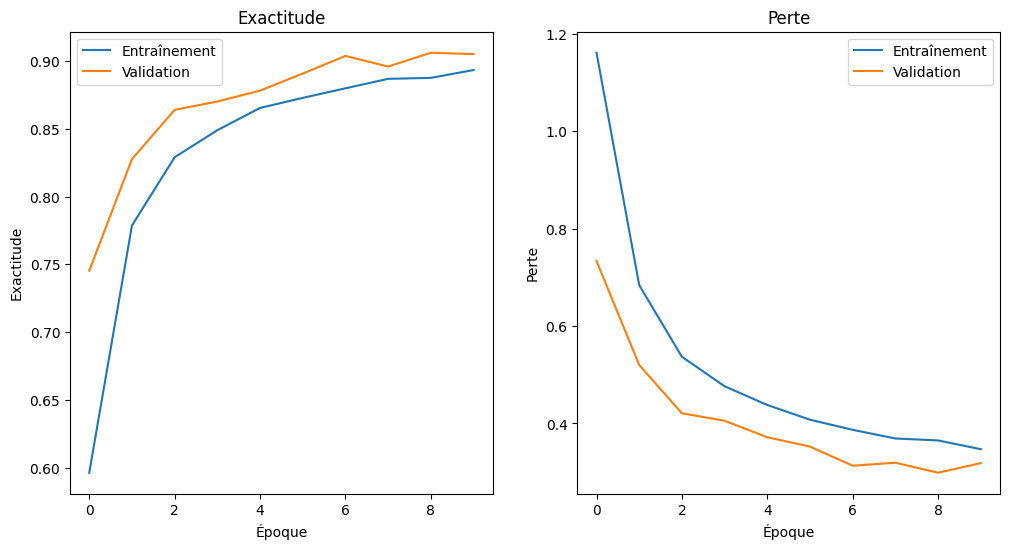

In [9]:
# Afficher les résultats
print(f"Taille de l'ensemble d'entraînement : {len(X_train)}")
print(f"Taille de l'ensemble de validation : {len(X_val)}")
print("Data augmentation utilisée : rotation, décalage, cisaillement, zoom, retournement horizontal")
print(f"Optimiseur : Adam (learning rate = {optimizer.lr.numpy()})")
print(f"Batch size : {batch_size}")
print(f"Nombre d'époques : {epochs} (avec arrêt précoce après {early_stop.patience} époques sans amélioration)")
print("Architecture du modèle :")

# Obtenir le résumé du modèle
model.summary()

print(f"- Fonctions d'activation : ReLU pour les couches cachées, Softmax pour la couche de sortie")
print(f"Temps d'entraînement : {(len(history.epoch) + 1) * epochs / 60:.2f} minutes")
print(f"Perte minimale : {min(history.history['loss']):.4f}")
print(f"Exactitude maximale : {max(history.history['accuracy']):.4f}")

# Tracer les courbes d'exactitude et de perte
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entraînement')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Exactitude')
plt.xlabel('Époque')
plt.ylabel('Exactitude')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entraînement')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.legend()

plt.show()